In [ ]:
#Q1. Perform basic EDA 

In [94]:
#Import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
df = pd.read_csv("house_price.csv")


In [6]:
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [8]:
# Check the shape and data types
print("\nShape of the dataset:", df.shape)
print("\nData types of columns:\n", df.dtypes)



Shape of the dataset: (13200, 7)

Data types of columns:
 location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object


In [10]:
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())



Missing values in each column:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [12]:
# Basic statistical summary
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [14]:
# Convert 'size' to numeric BHK column if not already done
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else x)

In [16]:
# Verify consistency in price_per_sqft column
df['calculated_price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df['price_per_sqft_check'] = np.isclose(df['price_per_sqft'], df['calculated_price_per_sqft'])
print("\nPrice per square foot consistency check:\n", df['price_per_sqft_check'].value_counts())



Price per square foot consistency check:
 price_per_sqft_check
False    10699
True      2501
Name: count, dtype: int64


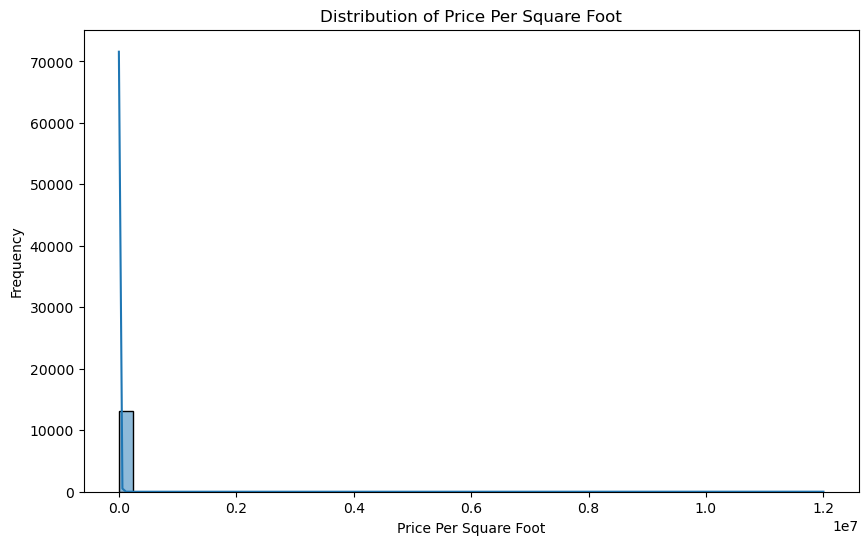

In [18]:
# Handling Outliers in 'price_per_sqft'
# Plot distribution of price_per_sqft
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=50)
plt.title('Distribution of Price Per Square Foot')
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.show()

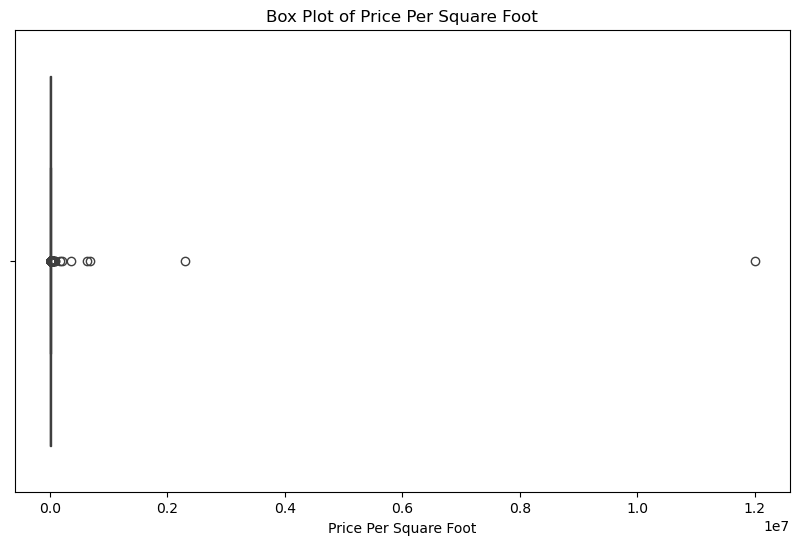

In [20]:
# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_per_sqft')
plt.title('Box Plot of Price Per Square Foot')
plt.xlabel('Price Per Square Foot')
plt.show()

In [22]:
# Remove outliers in price_per_sqft using the IQR method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]
print("\nDataset shape after outlier removal:", df.shape)



Dataset shape after outlier removal: (11935, 10)


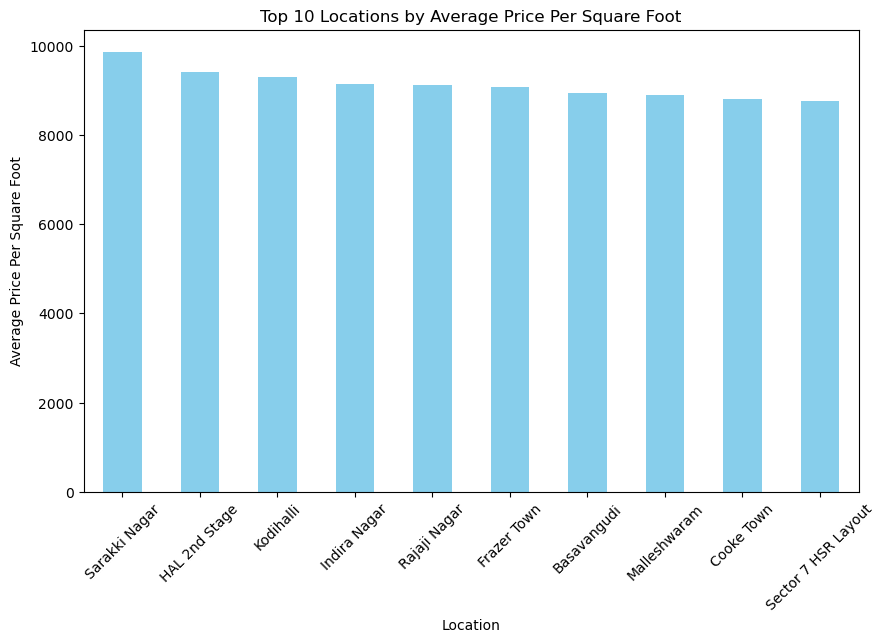

In [24]:
# Location-based average price_per_sqft
location_price_per_sqft = df.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False)
top_locations = location_price_per_sqft.head(10)

plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations by Average Price Per Square Foot')
plt.xlabel('Location')
plt.ylabel('Average Price Per Square Foot')
plt.xticks(rotation=45)
plt.show()


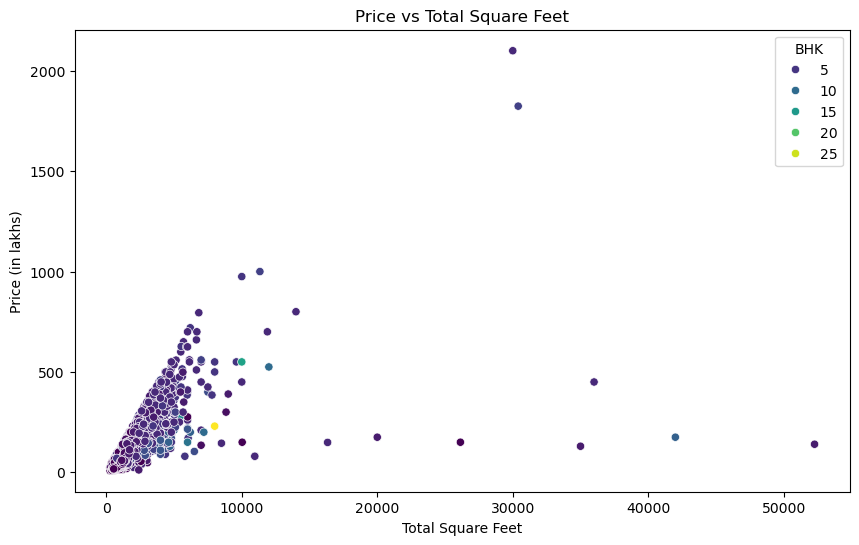

In [26]:
# Scatter plot: Price vs Total Square Feet
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_sqft', y='price', hue='BHK', palette='viridis')
plt.title('Price vs Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in lakhs)')
plt.legend(title='BHK')
plt.show()


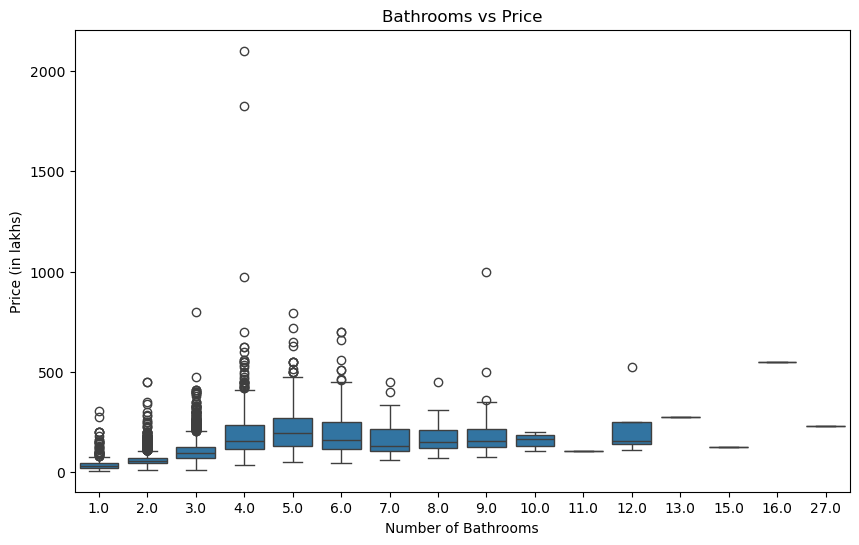

In [28]:
# Bathrooms vs Price Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bath', y='price')
plt.title('Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in lakhs)')
plt.show()


In [30]:
# Save the cleaned data for further analysis
df.to_csv("cleaned_house_price.csv", index=False)
print("\nCleaned data saved as 'cleaned_house_price.csv'")



Cleaned data saved as 'cleaned_house_price.csv'


In [32]:
# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

In [38]:
# Reload the cleaned dataset for a fresh start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_house_price.csv")

# Function to detect outliers using Z-Score
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std_dev = data[column].std()
    z_scores = (data[column] - mean) / std_dev
    return data[np.abs(z_scores) > threshold]
# Detecting outliers in price_per_sqft using Z-Score
outliers_zscore = detect_outliers_zscore(df, 'price_per_sqft', threshold=3)
print(f"Number of outliers detected in 'price_per_sqft' using Z-Score: {len(outliers_zscore)}")

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


Number of outliers detected in 'price_per_sqft' using Z-Score: 91


In [40]:
# Detecting outliers in price_per_sqft using IQR
outliers_iqr = detect_outliers_iqr(df, 'price_per_sqft')
print(f"Number of outliers detected in 'price_per_sqft' using IQR: {len(outliers_iqr)}")


Number of outliers detected in 'price_per_sqft' using IQR: 428


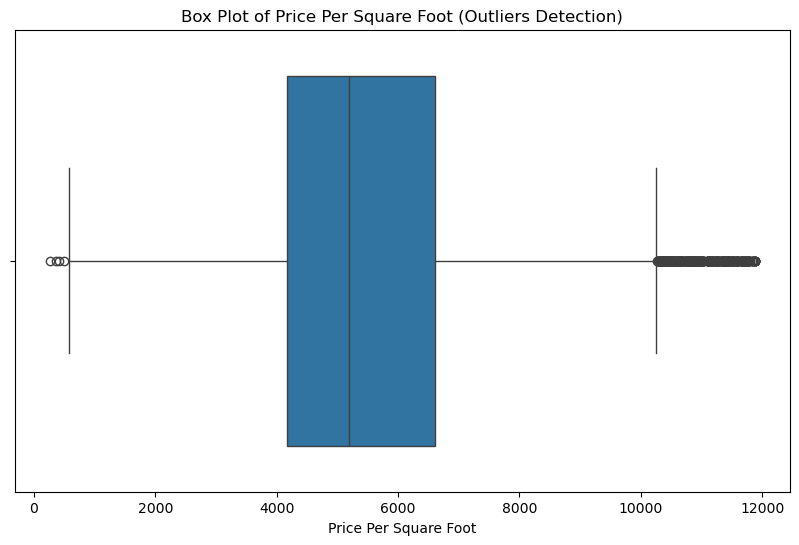

In [42]:
# Visualize outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_per_sqft')
plt.title('Box Plot of Price Per Square Foot (Outliers Detection)')
plt.xlabel('Price Per Square Foot')
plt.show()


In [44]:
# Handling Outliers

# 1. Trimming (Removing Outliers)
df_trimmed = df.copy()
df_trimmed = df_trimmed[(df_trimmed['price_per_sqft'] >= outliers_iqr['price_per_sqft'].min()) & 
                        (df_trimmed['price_per_sqft'] <= outliers_iqr['price_per_sqft'].max())]
print(f"Shape after trimming outliers: {df_trimmed.shape}")

Shape after trimming outliers: (11935, 10)


In [46]:
# 2. Capping (Replacing Outliers with Limits)
df_capped = df.copy()
Q1 = df_capped['price_per_sqft'].quantile(0.25)
Q3 = df_capped['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_capped['price_per_sqft'] = np.where(df_capped['price_per_sqft'] < lower_limit, lower_limit, df_capped['price_per_sqft'])
df_capped['price_per_sqft'] = np.where(df_capped['price_per_sqft'] > upper_limit, upper_limit, df_capped['price_per_sqft'])
print(f"Shape after capping outliers: {df_capped.shape}")

Shape after capping outliers: (11935, 10)


In [50]:
# 3. Imputation (Replacing Outliers with Median)
df_imputed = df.copy()
median_price_per_sqft = df['price_per_sqft'].median()
df_imputed['price_per_sqft'] = np.where((df_imputed['price_per_sqft'] < lower_limit) | (df_imputed['price_per_sqft'] > upper_limit), 
                                         median_price_per_sqft, df_imputed['price_per_sqft'])
print(f"Shape after imputing outliers: {df_imputed.shape}")



Shape after imputing outliers: (11935, 10)


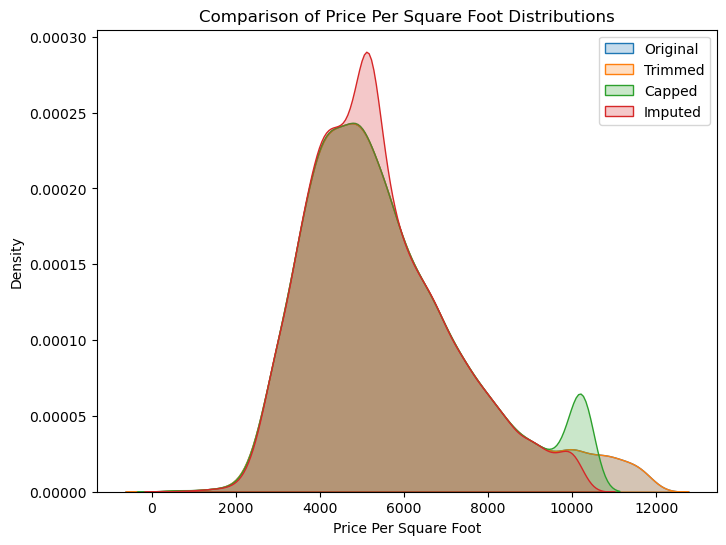

In [62]:
# Compare price_per_sqft distributions before and after outlier handling
plt.figure(figsize=(8, 6))

# Original
sns.kdeplot(df['price_per_sqft'], label='Original', fill=True)
# Trimmed
sns.kdeplot(df_trimmed['price_per_sqft'], label='Trimmed', fill=True)
# Capped
sns.kdeplot(df_capped['price_per_sqft'], label='Capped', fill=True)
# Imputed
sns.kdeplot(df_imputed['price_per_sqft'], label='Imputed', fill=True)

plt.title('Comparison of Price Per Square Foot Distributions')
plt.xlabel('Price Per Square Foot')
plt.legend()
plt.show()




In [ ]:
 # a) Mean and Standard deviation b)Percentile method c) IQR(Inter quartile range method) d) Z Score method

In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("cleaned_house_price.csv")

# --- a. Mean and Standard Deviation Method ---
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

lower_bound_mean = mean - 3 * std_dev
upper_bound_mean = mean + 3 * std_dev

df_mean = df[(df['price_per_sqft'] >= lower_bound_mean) & (df['price_per_sqft'] <= upper_bound_mean)]
print(f"Shape after Mean & Std Dev method: {df_mean.shape}")

# --- b. Percentile Method ---
lower_bound_percentile = df['price_per_sqft'].quantile(0.01)
upper_bound_percentile = df['price_per_sqft'].quantile(0.99)

df_percentile = df[(df['price_per_sqft'] >= lower_bound_percentile) & (df['price_per_sqft'] <= upper_bound_percentile)]
print(f"Shape after Percentile method: {df_percentile.shape}")

# --- c. Interquartile Range (IQR) Method ---
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

df_iqr = df[(df['price_per_sqft'] >= lower_bound_iqr) & (df['price_per_sqft'] <= upper_bound_iqr)]
print(f"Shape after IQR method: {df_iqr.shape}")

# --- d. Z-Score Method ---
df['z_score'] = (df['price_per_sqft'] - mean) / std_dev
df_zscore = df[np.abs(df['z_score']) <= 3]
print(f"Shape after Z-Score method: {df_zscore.shape}")

# --- Save cleaned datasets ---
df_mean.to_csv("house_price_mean.csv", index=False)
df_percentile.to_csv("house_price_percentile.csv", index=False)
df_iqr.to_csv("house_price_iqr.csv", index=False)
df_zscore.to_csv("house_price_zscore.csv", index=False)

print("Cleaned datasets saved as 'house_price_mean.csv', 'house_price_percentile.csv', 'house_price_iqr.csv', and 'house_price_zscore.csv'")


Shape after Mean & Std Dev method: (11844, 10)
Shape after Percentile method: (11695, 10)
Shape after IQR method: (11507, 10)
Shape after Z-Score method: (11844, 11)
Cleaned datasets saved as 'house_price_mean.csv', 'house_price_percentile.csv', 'house_price_iqr.csv', and 'house_price_zscore.csv'


In [ ]:
# Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all cleaned datasets into a dictionary for comparison
datasets = {
    "Original": df['price_per_sqft'],
    "Mean & Std Dev": df_mean['price_per_sqft'],
    "Percentile": df_percentile['price_per_sqft'],
    "IQR": df_iqr['price_per_sqft'],
    "Z-Score": df_zscore['price_per_sqft']
}


In [70]:
# Create a DataFrame for visualization
boxplot_data = pd.DataFrame(datasets)

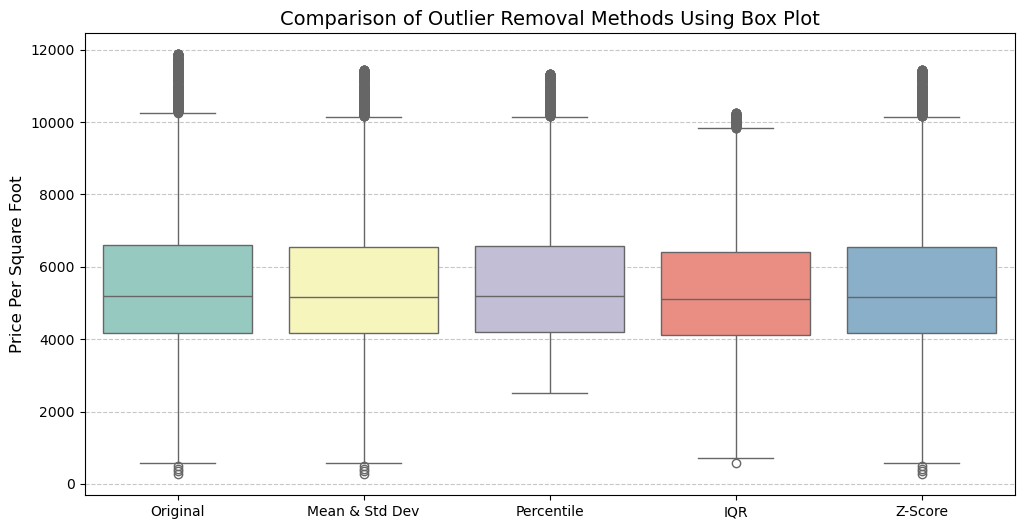

In [72]:
# Plotting the Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=boxplot_data, palette="Set3")

plt.title('Comparison of Outlier Removal Methods Using Box Plot', fontsize=14)
plt.ylabel('Price Per Square Foot', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations 
if needed. Check the skewness and kurtosis before and after the transformation.

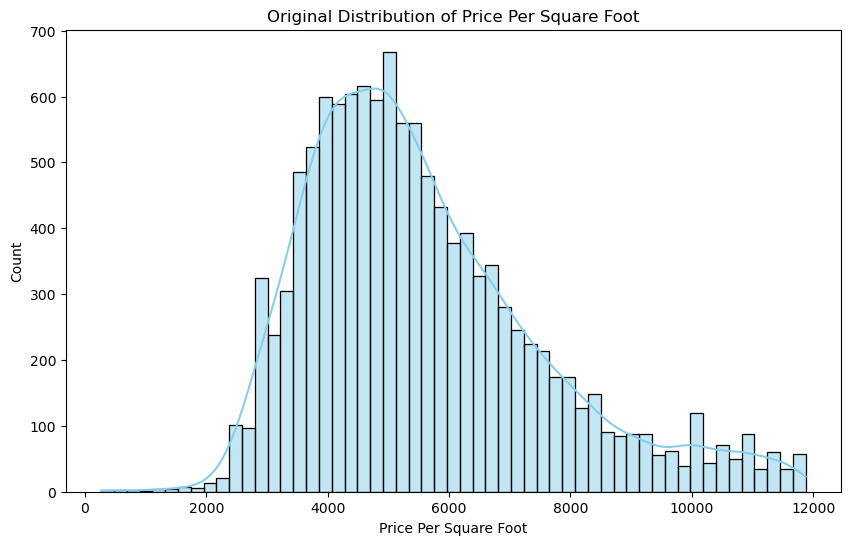

In [74]:
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Original Data ---
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, color='skyblue')
plt.title("Original Distribution of Price Per Square Foot")
plt.xlabel("Price Per Square Foot")
plt.show()

In [76]:
# Skewness and Kurtosis of Original Data
original_skewness = skew(df['price_per_sqft'])
original_kurtosis = kurtosis(df['price_per_sqft'])
print(f"Original Skewness: {original_skewness:.2f}")
print(f"Original Kurtosis: {original_kurtosis:.2f}")


Original Skewness: 0.94
Original Kurtosis: 0.68


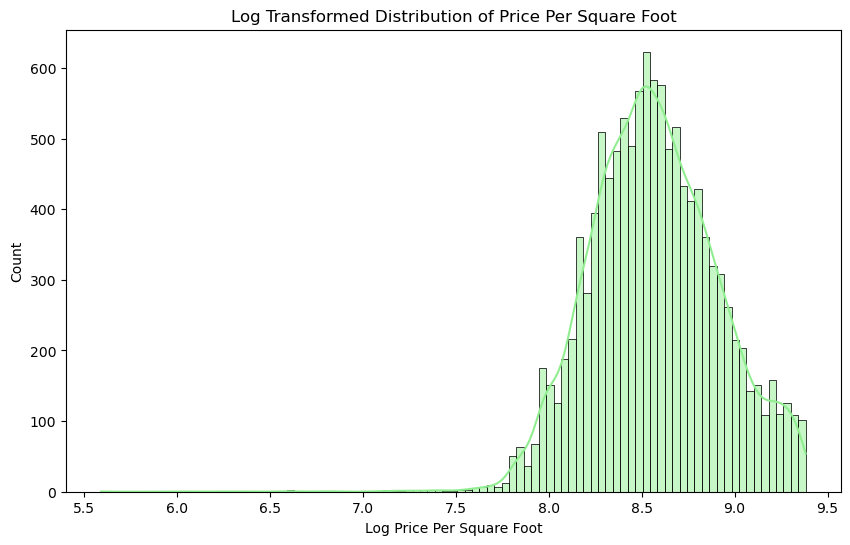

In [78]:
# --- Log Transformation ---
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])  # log(1 + x) to handle zeros
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price_per_sqft'], kde=True, color='lightgreen')
plt.title("Log Transformed Distribution of Price Per Square Foot")
plt.xlabel("Log Price Per Square Foot")
plt.show()

In [80]:
# Skewness and Kurtosis after Log Transformation
log_skewness = skew(df['log_price_per_sqft'])
log_kurtosis = kurtosis(df['log_price_per_sqft'])
print(f"Log Transformed Skewness: {log_skewness:.2f}")
print(f"Log Transformed Kurtosis: {log_kurtosis:.2f}")

Log Transformed Skewness: -0.13
Log Transformed Kurtosis: 1.34


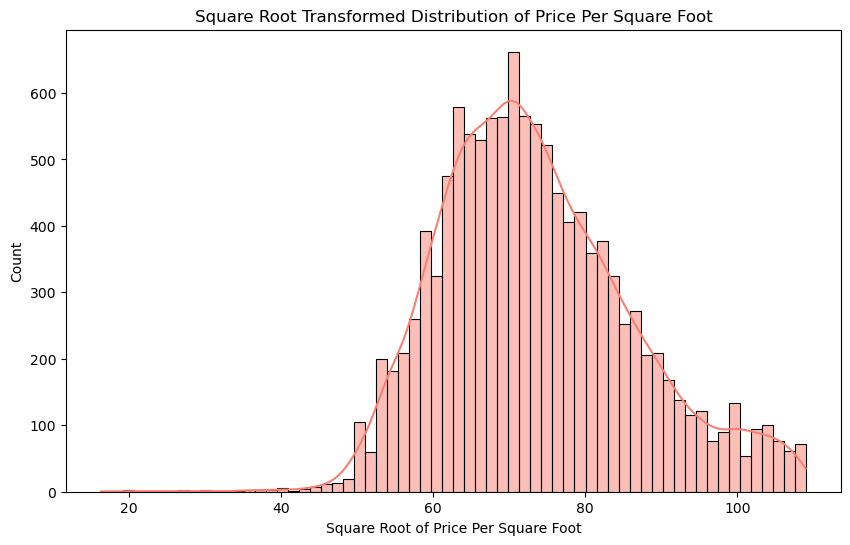

In [82]:
# --- Square Root Transformation ---
df['sqrt_price_per_sqft'] = np.sqrt(df['price_per_sqft'])
plt.figure(figsize=(10, 6))
sns.histplot(df['sqrt_price_per_sqft'], kde=True, color='salmon')
plt.title("Square Root Transformed Distribution of Price Per Square Foot")
plt.xlabel("Square Root of Price Per Square Foot")
plt.show()

In [84]:
# Skewness and Kurtosis after Square Root Transformation
sqrt_skewness = skew(df['sqrt_price_per_sqft'])
sqrt_kurtosis = kurtosis(df['sqrt_price_per_sqft'])
print(f"Square Root Transformed Skewness: {sqrt_skewness:.2f}")
print(f"Square Root Transformed Kurtosis: {sqrt_kurtosis:.2f}")

Square Root Transformed Skewness: 0.49
Square Root Transformed Kurtosis: 0.13


In [ ]:
#Q5. Check the correlation between all the numerical columns and plot heatmap.

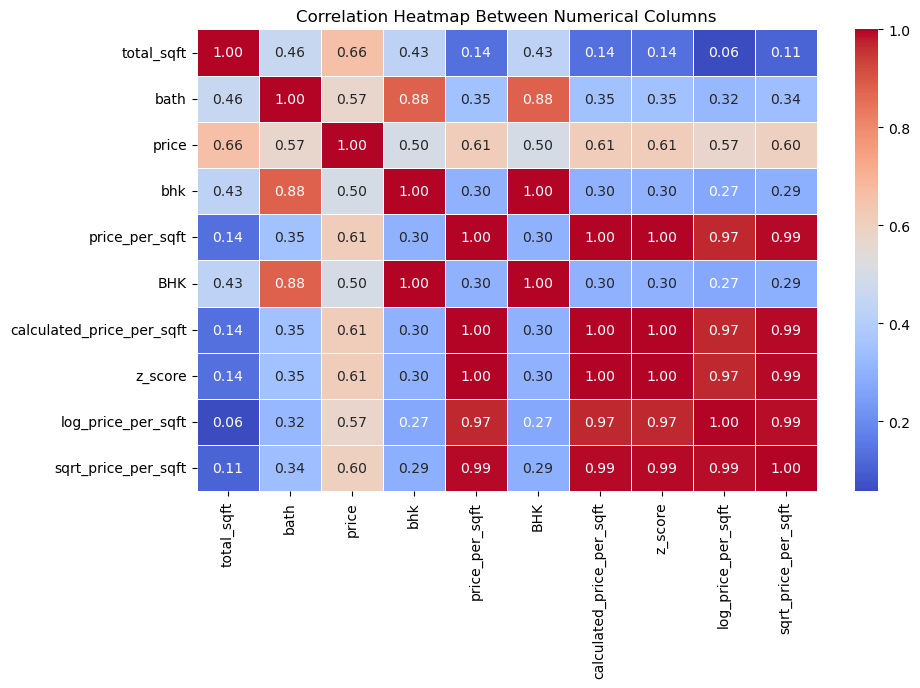

In [90]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_columns]
# Compute the correlation matrix
correlation_matrix = numerical_df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between Numerical Columns")
plt.show()

In [ ]:
#Q6. Draw Scatter plot between the variables to check the correlation between them.

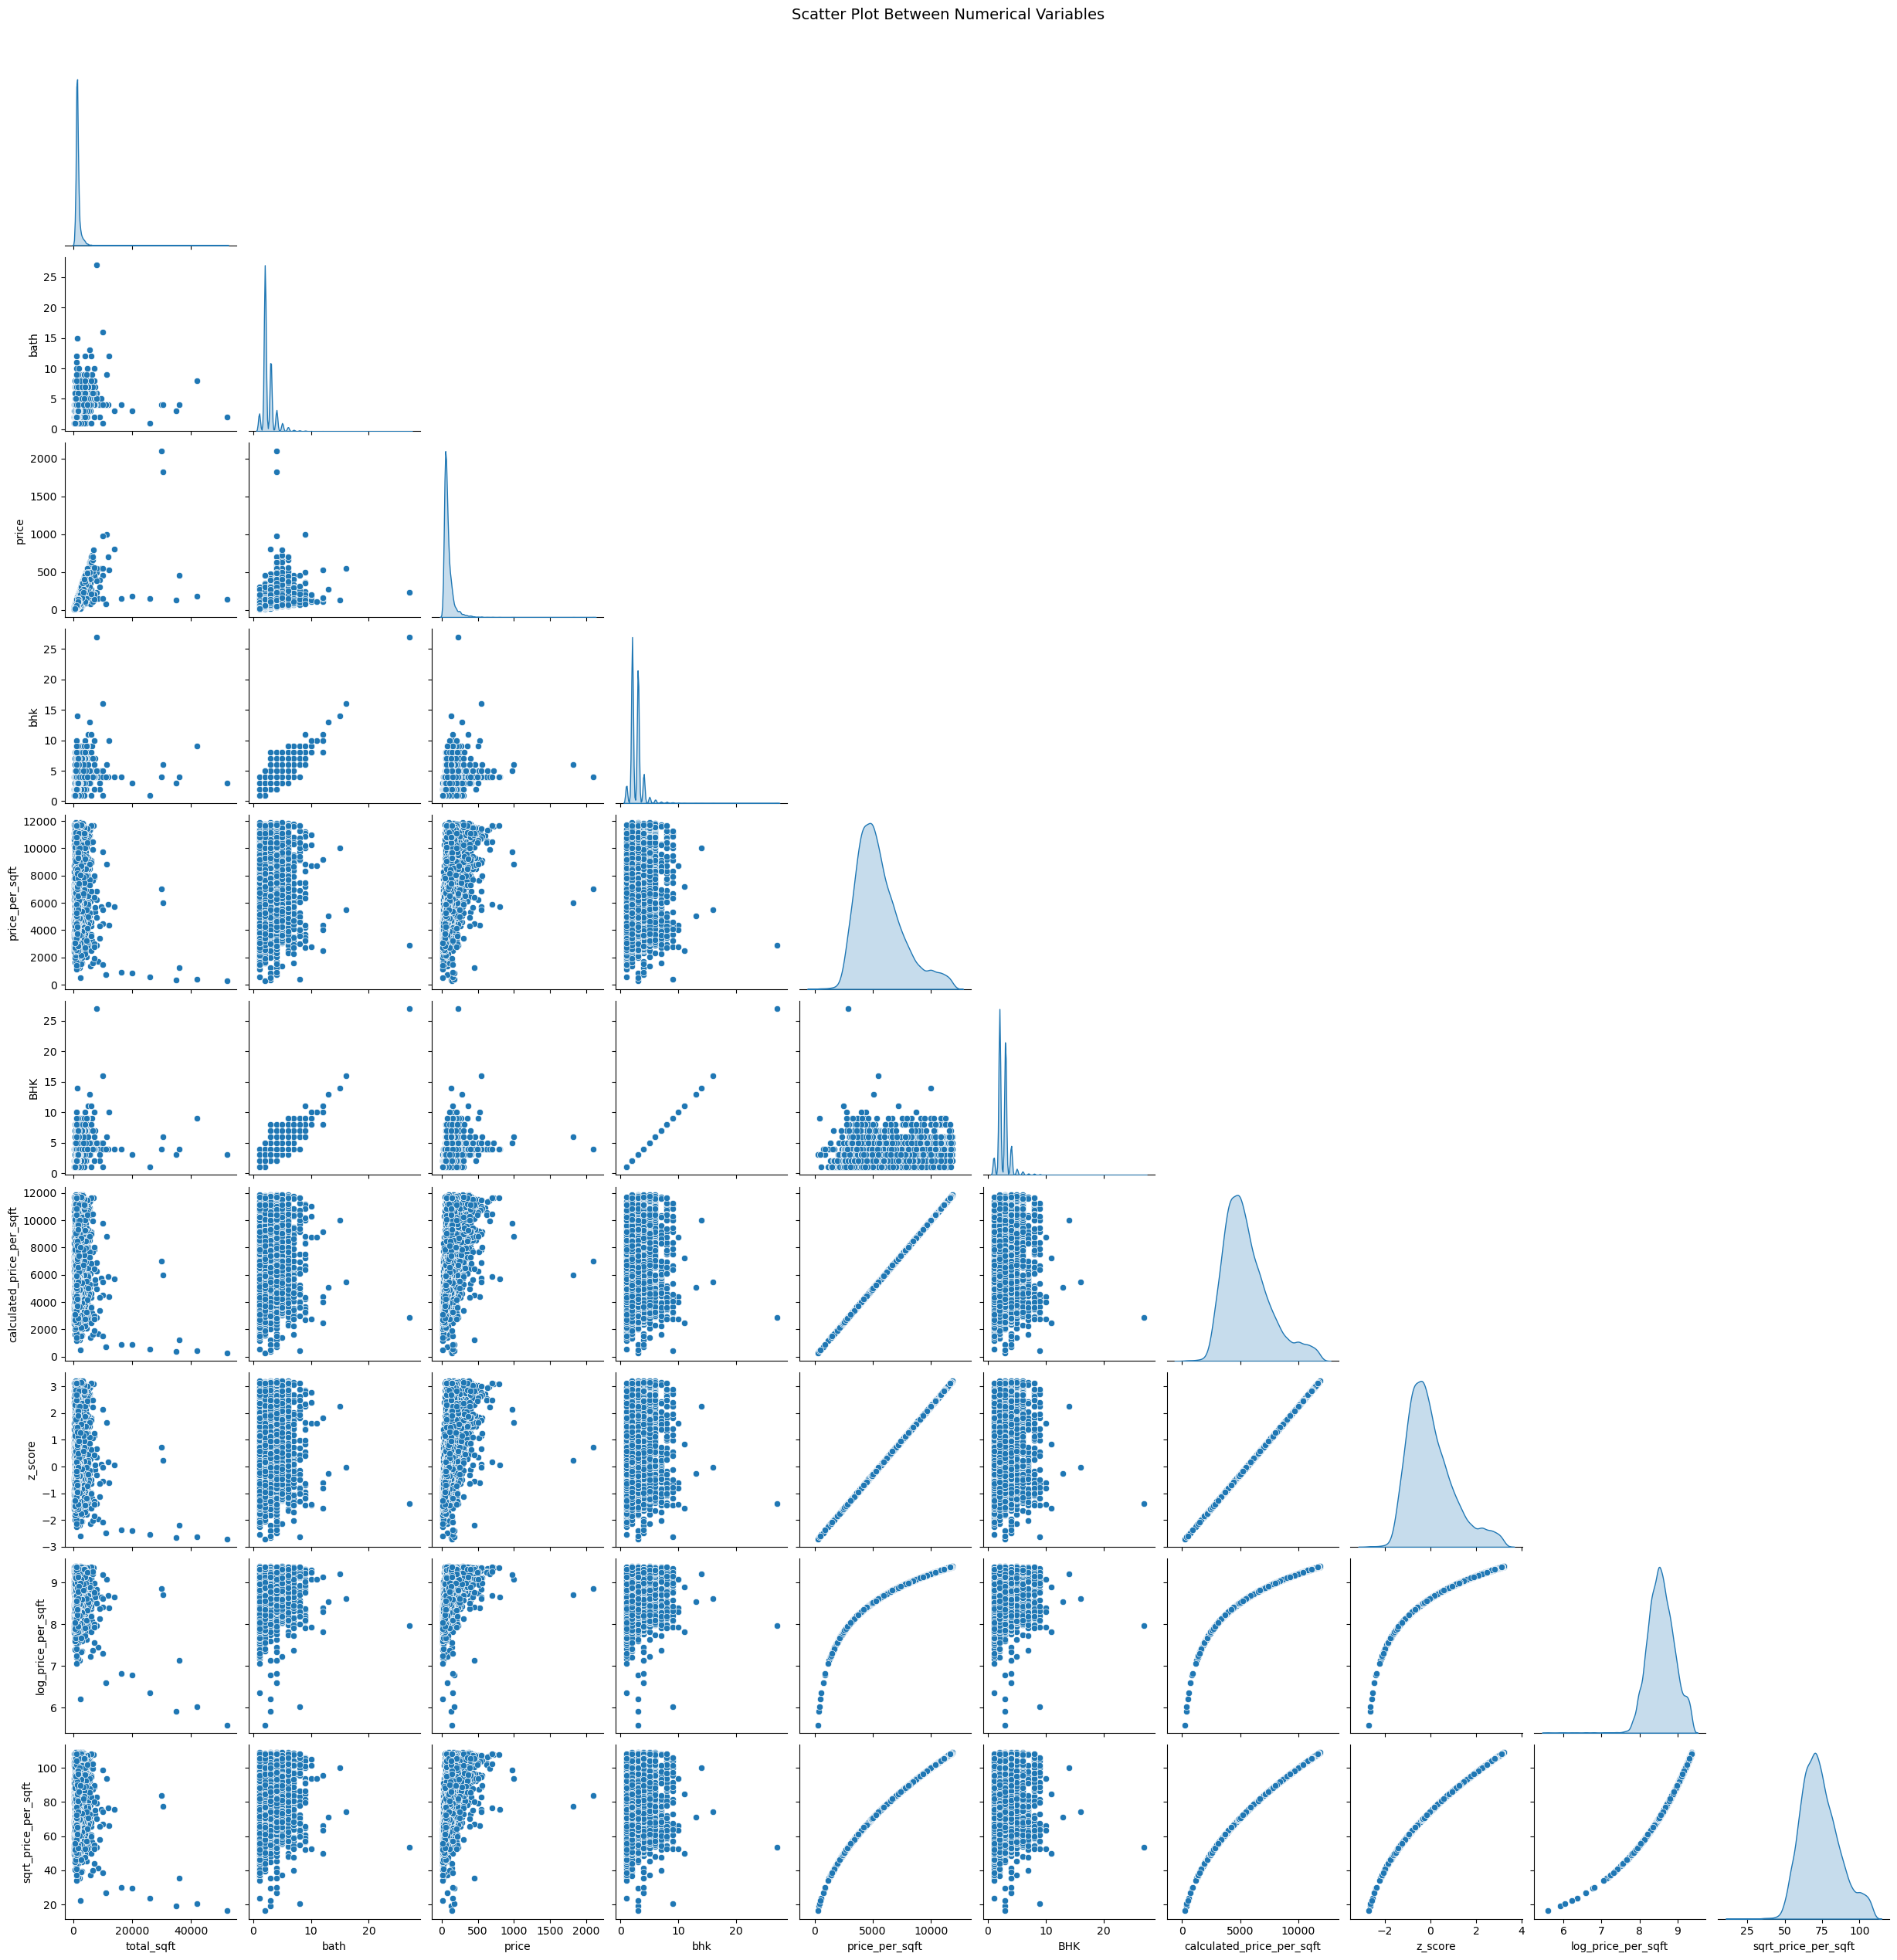

In [92]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pairwise scatter plot for numerical columns
sns.pairplot(numerical_df, diag_kind='kde', corner=True)
plt.suptitle("Scatter Plot Between Numerical Variables", y=1.02, fontsize=14)
plt.show()
